Skrypt analizujący stronę wydziałową pod kątem ilości pracowników na danych stanowiskach.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# otwarcie strony
driver = webdriver.Firefox()
driver.get("https://www.polsl.pl/rms/wydzial/pracownicy/")

In [3]:
# znalezienie listy pracowników
employeeList = driver.find_element(By.CLASS_NAME, "employee-list")
rows = employeeList.find_elements(By.CLASS_NAME, "mn-list-container-row")
print("Ilość znalezionych rekordów: ", len(rows))

# zmienna na dane pracowników
employeeData = []

for row in rows:
    # wyciągnięcie danych z wierszy
    cols = row.find_elements(By.XPATH, ".//div[@class='mn-list-container-item']")
    name = cols[0].get_attribute("innerText")
    positions = cols[1].find_elements(By.XPATH, ".//ul//li")
    positions = [position.get_attribute("innerText") for position in positions]
    
    # dodanie danych do listy
    employeeData.append([name, positions])

Ilość znalezionych rekordów:  63


In [4]:
# strukturyzacja danych
df = pd.DataFrame(employeeData, columns=['Nazwisko Imie', 'Stanowisko'])
df = df.explode('Stanowisko').reset_index(drop=True)
print(df)

            Nazwisko Imie                                         Stanowisko
0             Adam Marcin                       Adiunkt (Katedra Matematyki)
1   Adrianowicz Katarzyna  Adiunkt (Katedra Zastosowań Matematyki i Metod...
2        Artemovych Orest                      Profesor (Katedra Matematyki)
3       Banasik Arkadiusz  Asystent (Katedra Zastosowań Matematyki i Meto...
4     Bartłomiejczyk Lech                      Asystent (Katedra Matematyki)
..                    ...                                                ...
61           Wituła Roman             Kierownik Katedry (Katedra Matematyki)
62            Woryna Adam              Profesor uczelni (Katedra Matematyki)
63         Woźniak Marcin  Profesor (Katedra Zastosowań Matematyki i Meto...
64          Zielonka Adam  Adiunkt (Katedra Zastosowań Matematyki i Metod...
65            Żabka Marek                       Adiunkt (Katedra Matematyki)

[66 rows x 2 columns]


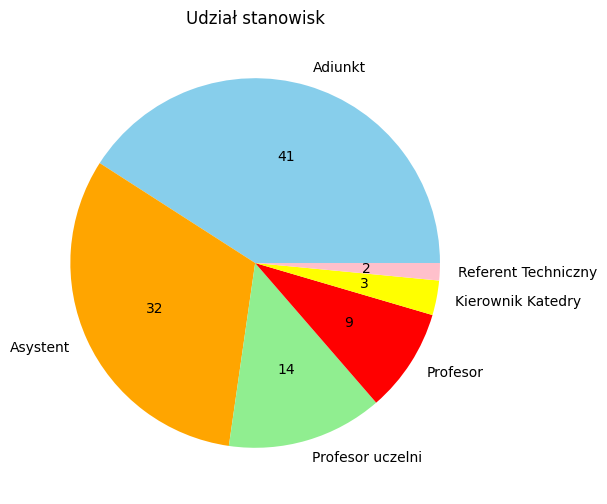

In [5]:
df['Stanowisko'] = df['Stanowisko'].str.replace(r'\s*\(.*?\)', '', regex=True)
stanowiskaCount = df['Stanowisko'].value_counts()

# stworzenie wykresu
stanowiskaCount.plot(kind='pie', 
                     autopct='%1.0f', 
                     colors=['skyblue', 'orange', 'lightgreen', 'red', 'yellow', 'pink']
                     , figsize=(6,6))
plt.title(f'Udział stanowisk')
plt.ylabel('')
plt.show()
